# General Introduction
**Assignment 1: Software Simulation of Leaky Integrate-and-Fire Model**

Simulating  LIF (Leaky Integrated-and-Fire) model, with 0th-order synaptic model, for nueromorphic computing.

τ 𝑑𝑉/𝑑𝑡 = 𝑅𝐼(𝑡) − (𝑉(𝑡) − 𝑉𝑟𝑒𝑠𝑡)

𝑖 (𝑡) = ∑ 𝑤𝑗𝑖 ∙ 𝑠𝑗 (𝑡)

𝑆𝑗 (𝑡) = ∑ 𝛿(𝑡 − 𝑡𝑗)

When 𝑉(𝑡) ≥ 𝑉𝜃(threshold), V(t) becomes 𝑉𝑟𝑒𝑠𝑡 and there will be an output spike.

---

We are given the following data:

```
I(t) (𝑚𝐴) = { 0 (if timestep ≤ 5000 or timestep > 15000)
               0.00005 (𝑖𝑓 5000 < 𝑡𝑖𝑚𝑒𝑠𝑡𝑒𝑝 ≤ 15000)
             }
```

Time stepsize = 0.1ms, and total number of time steps = 20,000

Text(0, 0.5, 'Current in mA')

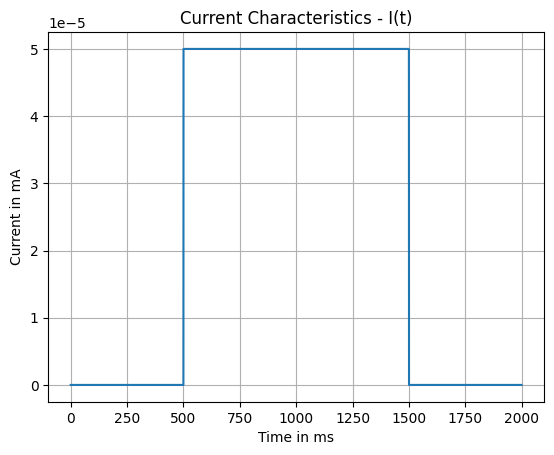

In [14]:
# Plotting the input function I(t)

import numpy as np
import matplotlib.pyplot as plt

num_steps = 20000
step_size = 0.1
time = np.arange(0, num_steps*step_size, step_size)

I = np.zeros(num_steps)
for t in time:
  if(t >= (5000*step_size) and t<= (15000*step_size)):
    I[round(t/step_size)] = 0.00005

plt.plot(time, I)
plt.grid()
plt.title("Current Characteristics - I(t)")
plt.xlabel("Time in ms")
plt.ylabel("Current in mA")

## Problem 1 - A single LIF neuron with the current stimulus.

𝑉𝑟𝑒𝑠𝑡 = -65mV, R=1 (MOhms), τ = 50ms;

For this case, we don't need the weights as there is single post-synaptic nueron

### Part 1 -- V_th = -20mV

In [2]:
tau = 50  # ms
R = 10**6  # Ohm
V_rest = -65  # mV
V_th = -20  # mV


V = np.zeros(len(time))
V[0] = V_rest
spike_times = []

for i in range(1, len(time)):
  dV = (-(V[i-1] - V_rest) + R * I[i-1]) * step_size / tau
  V[i] = V[i-1] + dV

  if V[i] >= V_th:
    V[i] = V_rest
    spike_times.append(time[i])

print(f"Number of spikes formed is :  {len(spike_times)}")

Number of spikes formed is :  8


#### Results

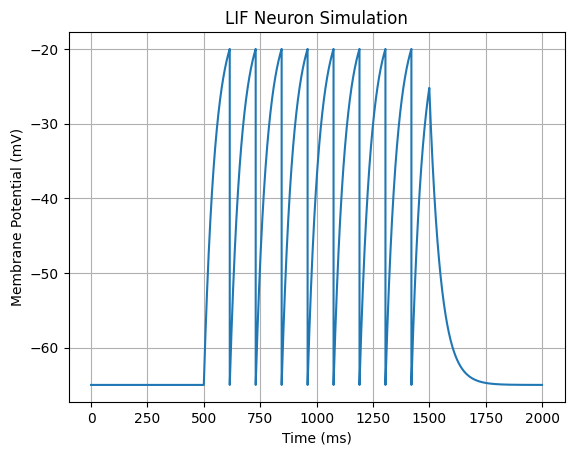

In [3]:
# Plot the results
plt.plot(time, V)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation")
plt.grid()
plt.show()

### Part 2 -- V_th = -30mV

In [4]:
tau = 50  # ms
R = 10**6  # mOhm
V_rest = -65  # mV
V_th = -30  # mV


V = np.zeros(len(time))
V[0] = V_rest
spike_times = []

for i in range(1, len(time)):
  dV = (-(V[i-1] - V_rest) + R * I[i-1]) * step_size / tau
  V[i] = V[i-1] + dV

  if V[i] >= V_th:
    V[i] = V_rest
    spike_times.append(time[i])

print(f"Number of spikes formed is :  {len(spike_times)}")

Number of spikes formed is :  16


#### Results

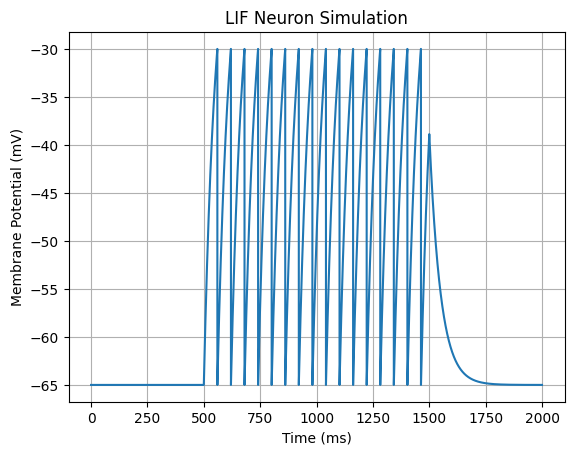

In [5]:
# Plot the results
plt.plot(time, V)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation")
plt.grid()
plt.show()

## Problem 2 - Multi-cell SNN LIF stimulus.

For Layer 1 - 𝑉𝑟𝑒𝑠𝑡 = -65mV, R=1 (MOhms), τ = 50ms, V_th = -35mV;

For Layer 2 - 𝑉𝑟𝑒𝑠𝑡 = -65mV, R=10 (MOhms), τ = 20ms, V_th = -60mV;

### Part 1 -- 𝑤14 = −0.00001, 𝑤24 = 0.0001, 𝑤34 = 0.00001, 𝑤15 = 0.00003, 𝑤25 = −0.00004, 𝑤35 = 0.00005

In [6]:
tau = [50, 50, 50, 20, 20]  # ms
R = [10**6, 10**6, 10**6, 10**7, 10**7]  # mOhm
V_rest = [-65, -65, -65, -65, -65]  # mV
V_th = [-35, -35, -35, -60, -60]  # mV

w_14 = -0.00001
w_24 = 0.0001
w_34 = 0.00001

w_15 = 0.00003
w_25 = -0.00004
w_35 = 0.00005

V_gen = np.zeros(len(time))
V_gen[0] = V_rest[0]
V = np.array([V_gen, V_gen, V_gen, V_gen, V_gen])

spike_times = [[],[],[],[],[]]

I4_curr = 0
I5_curr = 0
I4_next = 0
I5_next = 0

for i in range(1, len(time)):

  # For Nueron 1
  dV1 = (-(V[0][i-1] - V_rest[0]) + R[0] * I[i-1]) * step_size / tau[0]
  V[0][i] = V[0][i-1] + dV1

  if V[0][i] >= V_th[0]:
    V[0][i] = V_rest[0]
    I4_next += w_14
    I5_next += w_15
    spike_times[0].append(time[i])

  # For Nueron 2
  dV2 = (-(V[1][i-1] - V_rest[1]) + R[1] * I[i-1]) * step_size / tau[1]
  V[1][i] = V[1][i-1] + dV2

  if V[1][i] >= V_th[1]:
    V[1][i] = V_rest[1]
    I4_next += w_24
    I5_next += w_25
    spike_times[1].append(time[i])

  # For Nueron 3
  dV3 = (-(V[2][i-1] - V_rest[2]) + R[2] * I[i-1]) * step_size / tau[2]
  V[2][i] = V[2][i-1] + dV3

  if V[2][i] >= V_th[2]:
    V[2][i] = V_rest[2]
    I4_next += w_34
    I5_next += w_35
    spike_times[2].append(time[i])

  # For Nueron 4
  dV4 = (-(V[3][i-1] - V_rest[3]) + R[3] * I4_curr) * step_size / tau[3]
  V[3][i] = V[3][i-1] + dV4

  if V[3][i] >=V_th[3]:
    V[3][i] = V_rest[3]
    spike_times[3].append(time[i])

  # For Nueron 5
  dV5 = (-(V[4][i-1] - V_rest[4]) + R[4] * I5_curr) * step_size / tau[4]
  V[4][i] = V[4][i-1] + dV5

  if V[4][i] >= V_th[4]:
    V[4][i] = V_rest[4]
    spike_times[4].append(time[i])

  # Updating the current
  I4_curr = I4_next
  I5_curr = I5_next
  I4_next = 0
  I5_next = 0

for i in {0, 1,2,3,4}:
  print(f"Number of spikes formed for Nueron {i+1} is :  {len(spike_times[i])}")


Number of spikes formed for Nueron 1 is :  21
Number of spikes formed for Nueron 2 is :  21
Number of spikes formed for Nueron 3 is :  21
Number of spikes formed for Nueron 4 is :  21
Number of spikes formed for Nueron 5 is :  0


#### Results

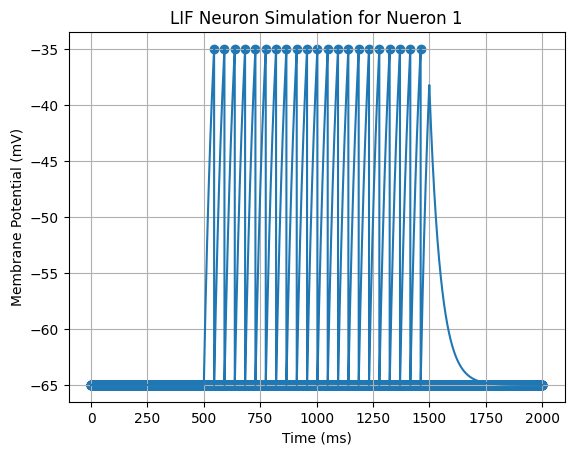

In [7]:
# Plot the results for Nueron 1
V_spiking = np.zeros(len(time))
for i in range(0, len(time)):
  if time[i] in spike_times[0]:
    V_spiking[i] = V_th[0]
  else:
    V_spiking[i] = V_rest[0]

plt.plot(time, V[0])
plt.scatter(time, V_spiking)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation for Nueron 1")
plt.grid()
plt.show()

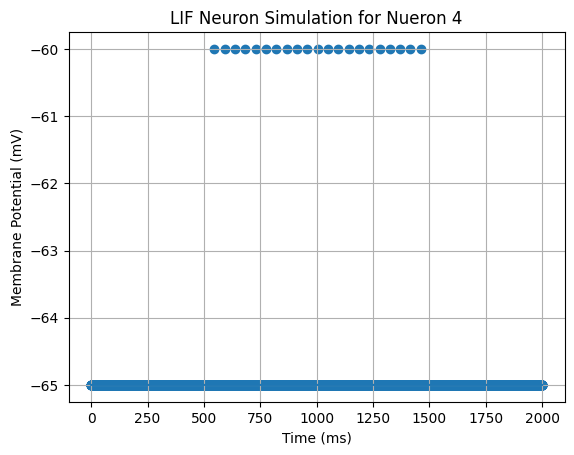

In [8]:
# Plot the results for Nueron 4
V_spiking = np.zeros(len(time))
for i in range(0, len(time)):
  if time[i] in spike_times[3]:
    V_spiking[i] = V_th[3]
  else:
    V_spiking[i] = V_rest[3]

plt.plot(time, V[3])
plt.scatter(time, V_spiking)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation for Nueron 4")
plt.grid()
plt.show()

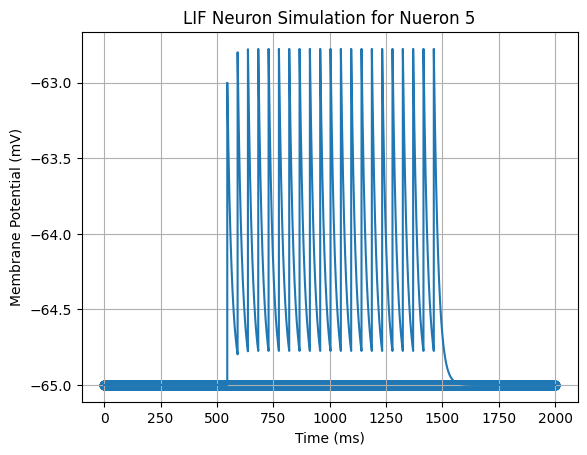

In [9]:
# Plot the results for Nueron 5
V_spiking = np.zeros(len(time))
for i in range(0, len(time)):
  if time[i] in spike_times[4]:
    V_spiking[i] = V_th[4]
  else:
    V_spiking[i] = V_rest[4]

plt.plot(time, V[4])
plt.scatter(time, V_spiking)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation for Nueron 5")
plt.grid()
plt.show()

### Part 2 -- 𝑤14 = 0.00001, 𝑤24 = 0.00001, 𝑤34 = 0.00001, 𝑤15 = 0.000005, 𝑤25 = 0.000005, 𝑤35 = −0.00001


In [10]:
tau = [50, 50, 50, 20, 20]  # ms
R = [10**6, 10**6, 10**6, 10**7, 10**7]  # mOhm
V_rest = [-65, -65, -65, -65, -65]  # mV
V_th = [-35, -35, -35, -60, -60]  # mV

w_14 = 0.00001
w_24 = 0.00001
w_34 = 0.00001

w_15 = 0.000005
w_25 = 0.000005
w_35 = -0.00001

V_gen = np.zeros(len(time))
V_gen[0] = V_rest[0]
V = np.array([V_gen, V_gen, V_gen, V_gen, V_gen])

spike_times = [[],[],[],[],[]]

I4_curr = 0
I5_curr = 0
I4_next = 0
I5_next = 0

for i in range(1, len(time)):

  # For Nueron 1
  dV1 = (-(V[0][i-1] - V_rest[0]) + R[0] * I[i-1]) * step_size / tau[0]
  V[0][i] = V[0][i-1] + dV1

  if V[0][i] >= V_th[0]:
    V[0][i] = V_rest[0]
    I4_next += w_14
    I5_next += w_15
    spike_times[0].append(time[i])

  # For Nueron 2
  dV2 = (-(V[1][i-1] - V_rest[1]) + R[1] * I[i-1]) * step_size / tau[1]
  V[1][i] = V[1][i-1] + dV2

  if V[1][i] >= V_th[1]:
    V[1][i] = V_rest[1]
    I4_next += w_24
    I5_next += w_25
    spike_times[1].append(time[i])

  # For Nueron 3
  dV3 = (-(V[2][i-1] - V_rest[2]) + R[2] * I[i-1]) * step_size / tau[2]
  V[2][i] = V[2][i-1] + dV3

  if V[2][i] >= V_th[2]:
    V[2][i] = V_rest[2]
    I4_next += w_34
    I5_next += w_35
    spike_times[2].append(time[i])

  # For Nueron 4
  dV4 = (-(V[3][i-1] - V_rest[3]) + R[3] * I4_curr) * step_size / tau[3]
  V[3][i] = V[3][i-1] + dV4

  if V[3][i] >=V_th[3]:
    V[3][i] = V_rest[3]
    spike_times[3].append(time[i])

  # For Nueron 5
  dV5 = (-(V[4][i-1] - V_rest[4]) + R[4] * I5_curr) * step_size / tau[4]
  V[4][i] = V[4][i-1] + dV5

  if V[4][i] >= V_th[4]:
    V[4][i] = V_rest[4]
    spike_times[4].append(time[i])

  # Updating the current
  I4_curr = I4_next
  I5_curr = I5_next
  I4_next = 0
  I5_next = 0

for i in {0, 1,2,3,4}:
  print(f"Number of spikes formed for Nueron {i+1} is :  {len(spike_times[i])}")


Number of spikes formed for Nueron 1 is :  21
Number of spikes formed for Nueron 2 is :  21
Number of spikes formed for Nueron 3 is :  21
Number of spikes formed for Nueron 4 is :  0
Number of spikes formed for Nueron 5 is :  0


#### Results

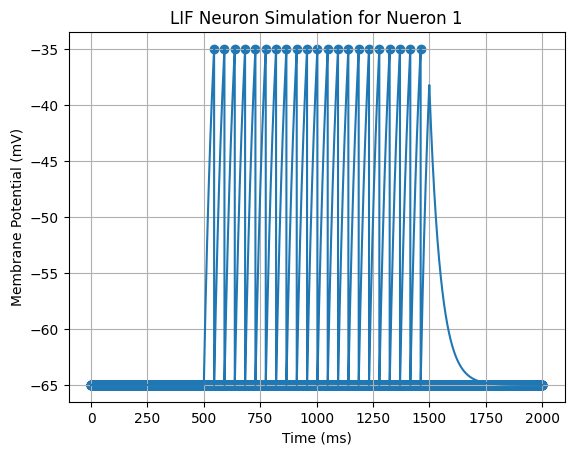

In [11]:
# Plot the results for Nueron 1
V_spiking = np.zeros(len(time))
for i in range(0, len(time)):
  if time[i] in spike_times[0]:
    V_spiking[i] = V_th[0]
  else:
    V_spiking[i] = V_rest[0]

plt.plot(time, V[0])
plt.scatter(time, V_spiking)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation for Nueron 1")
plt.grid()
plt.show()

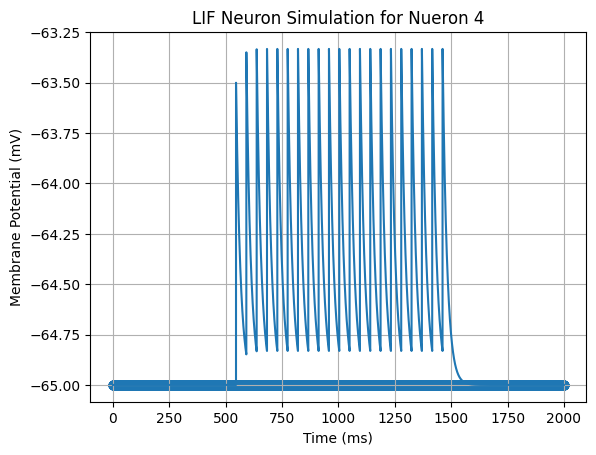

In [12]:
# Plot the results for Nueron 4
V_spiking = np.zeros(len(time))
for i in range(0, len(time)):
  if time[i] in spike_times[3]:
    V_spiking[i] = V_th[3]
  else:
    V_spiking[i] = V_rest[3]

plt.plot(time, V[3])
plt.scatter(time, V_spiking)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation for Nueron 4")
plt.grid()
plt.show()

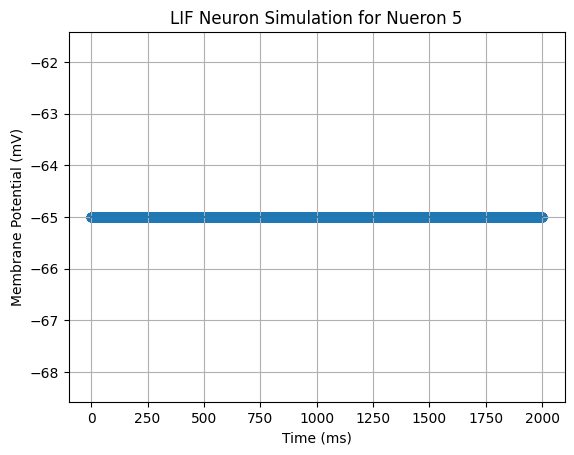

In [13]:
# Plot the results for Nueron 5
V_spiking = np.zeros(len(time))
for i in range(0, len(time)):
  if time[i] in spike_times[4]:
    V_spiking[i] = V_th[4]
  else:
    V_spiking[i] = V_rest[4]

plt.plot(time, V[4])
plt.scatter(time, V_spiking)
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.title("LIF Neuron Simulation for Nueron 5")
plt.grid()
plt.show()